# Hands-on 05: Modulação Analógica (modulando e demodulando AM-DSB, AM-DSB-SC, AM-SSB, QAM, FM

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre modulação de onda contínua AM e FM (banda-passante);
- Fazer uma breve revisão sobre demodulação de onda contínua AM e FM (banda-passante);
- Fazer uma breve revisão sobre modulação em quadratura;
- Praticar com protótipos em Matlab e Python de moduladores AM-DSB, AM-DSB-SC, AM-SSB, QAM e FM.

## Modulação em Amplitude (AM - _Amplitude Modulation_)
    
Como a maioria dos sinais em banda-base são de baixa frequência, estes não podem ser transmitidos efetivamente via rádio (sem fio). Além de viabilizar a transmissão sem fio e em longa distância, modular sinais em banda-passante permite a organização de canais em frequências não sobrepostas, possibilitando realizar duplexação, multiplexação e múltiplo acesso de maneira eficiente. Essa organização em frequência não sobrepostas faz com que vários sinais sejam transmistidos ao mesmo tempo sem que interfiram entre si. Para que isso seja feito, cada sinal é modulado em frequências de portadoras diferentes dentro de uma faixa de banda (largura de banda do canal).

Neste experimento adotaremos a seguinte notação:
- **$m(t)$** : Sinal em banda-base (sinal modulante);
- **$W$**    : Banda do sinal em banda-base (sinal modulante);
- **$c(t)$ **: Sinal portadora de alta frequência;
- **$f_{c}$**: Frequência da portadora não modulada;
- **$s(t)$ **: Sinal em banda-passante (sinal modulado);
- **$B$    **: Banda do sinal em banda-passante (sinal modulado).

Um sinal mensagem ($m(t)$) pode ser usado para **modular qualquer um dos parâmetros** (**amplitude**, **frequência** e **fase**) da onda portadora $c(t)$, permitindo que o sinal modulado $s(t)$ porte a informação de $m(t)$ do transmissor para o receptor. Considerando uma portadora escrita como:

$$c(t) = A\cdot cos(2\pi f t + \phi),$$

podemos definir:

- _Amplitude modulation_ $\Rightarrow $ - AM Amplitude $A$ é proporcional a $m(t)$; 
- _Frequency modulation_ - FM $\Rightarrow $ Frequência $f$ é proporcional a $m(t)$; 
- _Phase modulation_ - PM $\Rightarrow $ Fase $\phi$ é proporcional a $m(t)$.

### Modulação AM-DSB (Double-SideBand)

Como defindo acima, na modulação AM a amplitude é quem carrega a informação a ser enviada, sendo frequência e fase constantes. Considerando a entrada um toma senoidal, $m(t) = A_mcos(2 \pi  f_{m} t)$, a equação que descreve a onda AM-DSB é dada por:
$$s_{AM-DSB}(t)=A_{c}\cdot[1+m_{a}\cdot cos(2 \pi  f_{m} t)]\cdot cos(2\pi f_{c}t)$$       

Em que, $A_c$ é a amplitude da portadora e $m_{a}$ é chamado de índice de modulação, defindo por:
$$m_{a}=\frac{A_{m}}{A_{c}}$$

Podemos expandir a equação da seguinte forma:

$$s_{AM-DSB}(t)=A_{c}\cdot cos(2\pi f_{c}t)+A_c \cdot m_a\cdot cos(2\pi f_{c}t)cos(2 \pi  f_{m} t)$$

Com algumas manipulações trigonométricas chegamos a:

$$s_{AM-DSB}(t)=A_{c}\cdot cos(2\pi f_{c}t)+ \frac{A_c \cdot m_a}{2} \cdot cos[2\pi (f_{c}-f_m)t]+ \frac{A_c \cdot m_a}{2} \cdot cos[2\pi (f_{c}+f_m)t]$$

Ao abservar o sinal acima, notamos que a portadora é completamente transmistida, e duas bandas laterais (inferior e superior) são formadas nas frequências ($f_c - f_n$) e ($f_c + f_n$). Por isso o nome DSB.

Usando as propriedades da transformada de Fourier do cosseno, chegamos ao espectro do sinal como:

$$s_{AM-DSB}(t)=\frac{A_{c}}{2} \cdot \left [ \delta(f-f_c)+\delta(f+f_c) \right ] + \frac{A_{c} \cdot m_a}{4} \cdot \left [ \delta(f+f_c-f_m)+\delta(f-f_c+f_m) \right ] + \frac{A_{c} \cdot m_a}{4} \cdot \left [ \delta(f+f_c+f_m)+\delta(f-f_c-f_m) \right ]$$

Visualmente, os sinais, no tempo e frequência, envolvidos no AM-DSB podem ser vistos na figura a seguir:

![fig_AM_DSB_TOM](./FIGS/HD_05/am_tom.png)

Note também que a banda do sinal modulado é duas vezes a banda do sinal modulandte. 

Para um sinal $m(t)$ qualquer, o AM-DSB é definido como:

$$s_{AM-DSB}(t)=A_{c}\cdot[1+k_{a}\cdot m(t))]\cdot cos(2\pi f_{c}t)$$

Em que $k_{a}$ é chamado de Sensibilidade de Amplidute do modulador.

Usando a propriedade de Fourier $m(t)cos(2\pi f_{c}t)\Leftrightarrow \frac{1}{2}[M(f+f_{c})+M(f-f_{c})]$, podemos escrever o espectro do AM-DSB para uma entrada $m(t)$ qualquer, como:

$$s_{AM-DSB}(t)=\frac{A_{c}}{2} \cdot \left [ \delta(f-f_c)+\delta(f+f_c) \right ] + \frac{A_{c} \cdot k_a}{2} [M(f+f_{c})+M(f-f_{c})]$$

sendo $M(f+f_{c})$ deslocamento para direita e $M(f-f_{c})$ deslocamento para esquerda. Nota-se novamente a formação de uma banda superior  (USB, Upper SideBand) à $f_{c}$ e uma banda inferior (LSB, Lower SideBand) à $f_{c}$. Ambas bandas laterais tem largura de banda $B = 2 \cdot W$ (para um $m(t)$ qualquer de banda $W$). A figura a seguir ilustra o espectro dos sinais envolvidos no AM-DSB para um $m(t)$ limitado em banda $W$.

![fig_AM_DSB_M](./FIGS/HD_05/am_dsb_mt.png)

# Prática 1: Modulação AM-DSB

Nesse prática, os sinais envolvidos na modulação AM-DSB são gerados e visualizados no tempo e na frequência.

**Passo 01:** Abra um script no Matlab, salve-o como **handson5_1.m** e escreva o seguinte código:

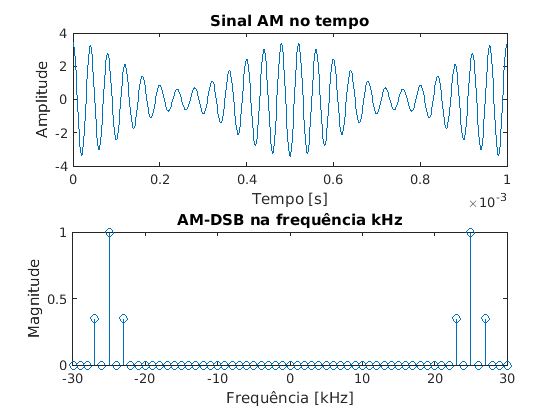

In [1]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ac = 2;                                                         % Amplitude da portadora
Mu = 0.7;                                                       % Índice de modulação
fc = 25000;                                                     % Frequência da portadora Hz
fm = 2000;                                                      % Frequência do sinal Hz
Ts = 1e-6;                                                      % Tempo de amostragem pequeno (modelar sinal contínuo)
t = [0:999]*Ts;                                                 % Definição do vetor tempo
s = Ac*(1+Mu*cos(2*pi*fm*t)).*cos(2*pi*fc*t);                   % Modulação AM      

%% Cálculo da FFT de AM-DSB
lfft=30;                                                        % Número de elementos da fft
k = [-lfft:lfft];                                               % Vetor de frequências 
Nx = length(s);                                                 % Comprimento do sinal modulado
Nk = length(k);                                                 % Comprimento do sinal em frequência
c = zeros(1,Nk);                                                % Incialização do vetor da magnitude
Xk = fft(s)/Nx;                                                 % Cálculo da FFT

%% A fft em 30 pontos (para melhor visualização)
fsampling = 1/Ts;                                               % Taxa de amostragem
freq = k*fsampling/Nx;                                          % Eixo de frequências
for i = 1:Nk-1
    kk = k(i);
    if (kk >= 0),
        c(i) = Xk(kk+1);
    else
        c(i) = Xk(Nx+1+kk);
    end
end

%% Gráficos
subplot(2,1,1);
plot (t,s);                                                     % Gráfico do AM-DSB no tempo
title('Sinal AM no tempo');
xlabel('Tempo [s]');
ylabel('Amplitude');
subplot(2,1,2);
stem(freq/1e3,real(c));                                         % Gráfico do AM-DSB na frequência
title('AM-DSB na frequência kHz');                             
xlabel('Frequência [kHz]');
ylabel('Magnitude');
axis([-30 30 0 1]);

### Comentários sobre o código

- Sinal modulante é construído como um tom senoidal de frequência $f_m$ (parâmetro de entrada);
- O índice de modulação $m_a$, a frequência da portadora $f_c$ e a amplitude da portadora $A_c$ são parâmetros de entrada;
- Para melhor visualização do espectro, a fft foi amostrada em somente 30 pontos com o seguinte trecho de código:

> ```python
for i = 1:Nk-1
    kk = k(i);
    if (kk >= 0),
        c(i) = Xk(kk+1);
    else
        c(i) = Xk(Nx+1+kk);
    end
end
```

Pelo espectro do sinal modulado, pode-se verificar a formação de $M(f+f_{c})$ e $M(f-f_{c})$, adjacente a portadora,formando as parcelas USB (externa) e LSB (interna).

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_1.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

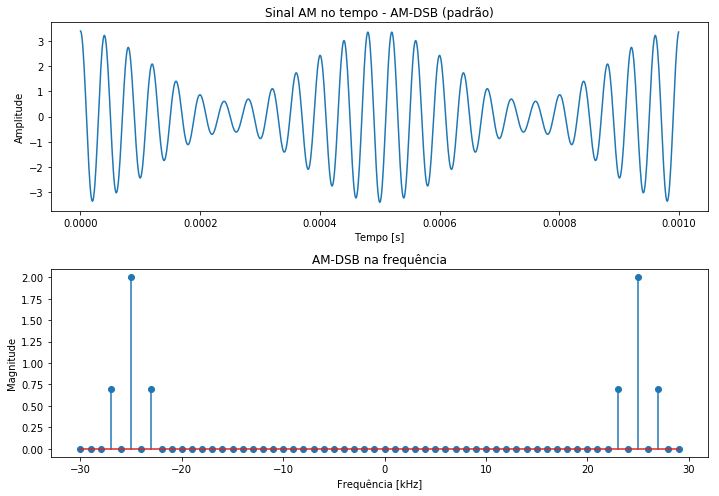

In [8]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu = 0.7                                                       # Índice de modulação
fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000
Ts = 1e-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
t = np.arange(N)*Ts
s = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f = 2.0*np.abs((fftpack.fft(s)))/N                           # Cálculo da FFT
Ns = len(s)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência
S_f_new = np.zeros(Nk)                                         # Incialização do vetor da frequência

# A fft em 30 pontos (para melhor visualização)
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências
for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f_new[i] = S_f[kk]
    else :
        S_f_new[i] = S_f[Ns+kk]

# Gráfico do AM-DSB no tempo
plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(t,s)
plt.title("Sinal AM no tempo - AM-DSB (padrão)")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

# Gráfico do AM-DSB na frequência
plt.subplot(212)
plt.title("AM-DSB na frequência")
plt.xlabel("Frequência [kHz]")
plt.ylabel("Magnitude")
plt.stem(freq/1e3,S_f_new)

plt.tight_layout()
plt.show()

**Passo 3 (para o relatório):** mude o código em python para expressar os três casos de modulação clássicos: (i) 100% de modulação; (ii) submodulação; e (iii) sobremodulação.

** Passo 4  (para o relatório):** use o que foi aprendido sobre cálculo de potência no [**hands-on 4** ](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004_LabPSC/blob/master/h04_python.ipynb) para calcular a potência com as amostras do sinal AM-DSB. Escreva um script em python com as contas da potência teórica e da potência calculada pelas amostras. Qualquer método de cálculo de potência pode ser usado.

# Prática 2: recepção AM-DSB (detecção de envoltória) 

O circuito bem simples capaz de realizar a demodulação AM-DSB é composto por três elementos (diodo, resistor e capacitor), como mostrado na figura a seguir.

![Figura01](./FIGS/HD_05/EasyDEADemoduladorAM.png)

Inicialmente, o sinal AM-DSB é retificado pelo diodo, e simultâneamente, no ciclo positivo da onda, carrega o capacitor. Em seguida, o capacitor descarrega no resistor. Esse ciclo de carga e descarga do capacitor ocorre conforme a amplitude da onda Am-DSB é maior ou não do que a carga atual do capacitor. Assim, o circuito é capaz de seguir os picos positivos da onda AM, produzindo um sinal proporcional a sua envoltória. O sinal resultante desse circuito pode ser aplicado a um filtro e a um eliminador de componente DC para que a onda $m(t)$ seja recuperada.

Montaremos um script que fará modulação AM-DSB e em seguida, modelando esse circuito, realizará sua demodulação. Faremos um laço com as condições de carga e descarga do capacitor e nele acrescentaremos a constante de descarga do capacitor no restistor ($\tau $).

**Passo 01:** Abra um script no Matlab, salve-o como **handson5_2.m** e escreva o seguinte código:

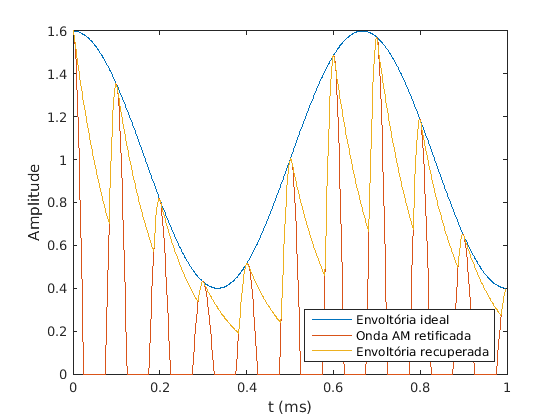

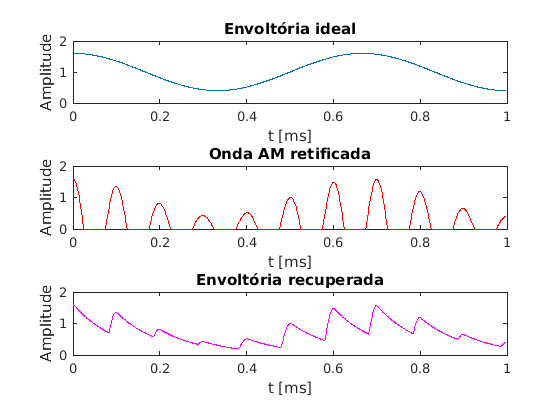

In [2]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
tau = 1e-4;                                                     % Constante de tempo do detector de envelope
t = [0:999]*1e-6;                                               % Definição do vetor tempo
Ts = 1e-6;                                                      % Definiçao do periodo
fc = 10000;                                                     % Frequencia da portadora
fm = 1500;                                                      % Frequencia do sinal
Mu = 0.6;                                                       % Indice de modulação
x_AMo = (1+Mu*cos(2*pi*fm*t)).*cos(2*pi*fc*t);                  % Onda Modulada AM-DSB

%% Envelope ideal do AM-DSB
x_envIdeal = abs(1+Mu*cos(2*pi*fm*t));

% Detector de envelope.
x_AM = x_AMo.*(x_AMo>0);                                        % Parte positiva da onda AM
x_env = zeros(size(x_AM));                                      % Vetor de zeros vetor pra guardar o envelope
nSamp = length(x_AM);                                           % Número de amostras da onda AM
out = -1;                                                       % Saída inicial (temporária)
%% Cálculo da saida
for i=1:nSamp,
    inp = x_AM(i);
    if (inp>=out)                                               % Caso 1: x_am(t) > Vc(t) (carga do capacitor)
        out = inp;
    else                                                        % Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
        out = out*(1-Ts/tau);
    end
    x_env(i) = out;
end

% Gráfico envoltória ideal
subplot(3,1,1);
plot(1000*t,x_envIdeal);
title('Envoltória ideal');
ylabel('Amplitude');
xlabel('t [ms]');
% Gráfico envoltória ideal
subplot(3,1,2);
plot(1000*t,x_AM,'r');
title('Onda AM retificada');
ylabel('Amplitude');
xlabel('t [ms]');
subplot(3,1,3);
plot(1000*t,x_env,'m');
title('Envoltória recuperada');
ylabel('Amplitude');
xlabel('t [ms]');

% Gráfico composto
figure;
plot(1000*t,x_envIdeal,1000*t,x_AM,1000*t,x_env);
ylabel('Amplitude');
xlabel('t (ms)');
legend('Envoltória ideal','Onda AM retificada','Envoltória recuperada','location','southeast');

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_2.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

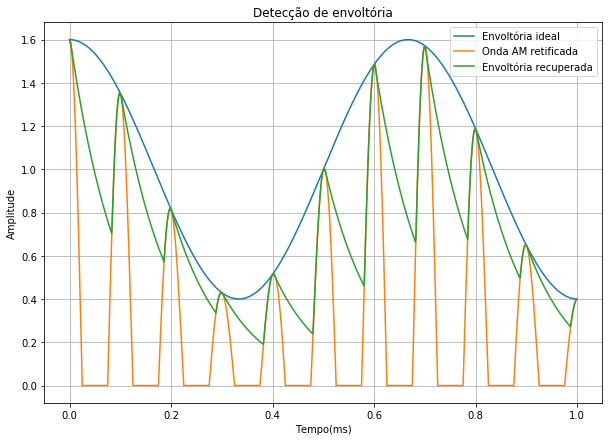

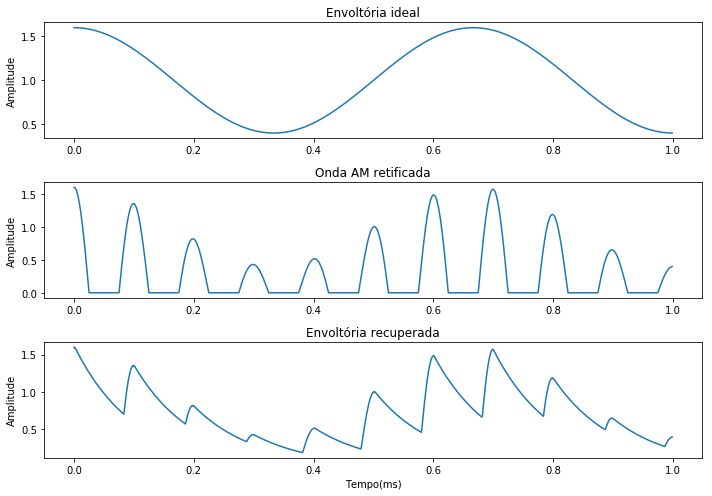

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

tau = 1e-4                                                      # Constante de tempo do detector de envelope
t = np.arange(1000)*1e-6                                        # Definição do vetor tempo
Ts=1e-6                                                         # Definiçao do periodo
fc = 10000                                                      # Frequencia da portadora.
fm = 1500                                                       # Frequencia do sinal
Mu = 0.6                                                        # Indice de modulaçao.
Ac = 1.0
x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env[i] = out

# gráfico composto
plt.figure(1,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_envIdeal)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env)
plt.grid()
plt.legend(["Envoltória ideal","Onda AM retificada","Envoltória recuperada"])
plt.show()


## Gráficos com a função plt.plot()
plt.figure(1,[10,7])
plt.subplot(311)
plt.plot(t*1000,x_envIdeal)                             
plt.title("Envoltória ideal")
plt.ylabel("Amplitude")

plt.figure(1,[10,7])
plt.subplot(312)
plt.plot(t*1000,x_AM)                             
plt.title("Onda AM retificada")
plt.ylabel("Amplitude")

plt.figure(1,[10,7])
plt.subplot(313)
plt.plot(t*1000,x_env)                             
plt.title("Envoltória recuperada")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")

plt.tight_layout()
plt.show()

### Comentários sobre o código

- Sinal modulado é construído como um tom senoidal de frequência $f_m$, índice de modulação $m_a$, frequência da portadora $f_c$, a amplitude da portadora $A_c$ (todos parâmetros de entrada);
- Como esse é um código que está modelando o comportamento de um circuito, os parâmetros do circuitos podem (devem) estar presentes no código. Nesse exemplo simples, isso é materializado pelo parâmetro $\tau$ (constante de tempo do circuito);
- O efeito do diodo, que conduz somente no semiciclo positivo, é modelado por 

>```python
x_AM = x_AMo*(x_AMo>0)                                          
```

- Já o processo de carga e descarga do capacitor é modelado por:

>```python
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env[i] = out
>```
É possível perceber no código o efeito da carga (no semiciclo positivo relativo a carga já armazena no capacitor) e de descarga no semicíclo negativo em relação a carga já armazenada no capacitor).

Esse tipo de modulação é recomendado em sistemas de radiodifusão, em que há um grande número de receptores em relação ao de transmissores, é mais econômico um transmissor caro de alta potência e receptores baratos disponíveis ao público em geral.

**Passo 3 (para o relatório):** Escreva um script em python que calcule o erro médio quadrático entre a envoltória ideal e a envoltória recuperada para os seguintes valores de $\tau$: 

a) $\tau = 10^{-4}$;

b) $\tau = 2 \cdot 10^{-4}$;

c) $\tau = 4 \cdot 10^{-3}$.

Disserte sobre os três valores de $\tau$ e o valor do erro. Quais os fatores causadores do erro?

# Prática 2: Modulação AM-DSB-SC 

A modulação AM-DSB-SC consiste em suprimir a portadora da modulação AM-DSB, deixando o sinal modulado mais eficiente em termos de potência. Isso é efeito da eliminação do desperdício de potência em transmitir a portadora, pois no AM-DSB-SC, somente as bandas laterais são transmitidas, já que elas que carregam a informação $m(t)$. Em outras palavras, quando não houver sinal $m(t)$, não haverá sinal enviado ($s(t)$ = 0). 

Por definição, um sinal modulado em AM-DSB-SC é:

$$s(t) = m(t)\cdot c(t)$$

com $c(t) = A_c \cdot cos(2\pi f_{c}t)$.

Usando a propriedade de Fourier $m(t)cos(2\pi f_{c}t)\Leftrightarrow \frac{1}{2}[M(f+f_{c})+M(f-f_{c})]$, podemos escrever o espectro do AM-DSB-SC para uma entrada $m(t)$ qualquer, como:

$$s_{AM-DSB}(t)= \frac{A_{c}}{2} [M(f+f_{c})+M(f-f_{c})]$$

sendo $M(f+f_{c})$ deslocamento para direita e $M(f-f_{c})$ deslocamento para esquerda. Nota-se novamente a formação de uma banda superior  (USB, Upper SideBand) à $f_{c}$ e uma banda inferior (LSB, Lower SideBand) à $f_{c}$. Ambas bandas laterais tem largura de banda $B = 2 \cdot W$ (para um $m(t)$ qualquer de banda $W$). Contudo, diferente do AM-DSB, a portadora não está presente no sinal $s(t)$.

Esse experimento tem como objetivo abir um sinal pré-existente (arquivo am_demo1.mat), modulá-lo em AM-DSM e mostrar graficamente os sinais resultantes. 

Usamos um sinal disponibilizado no livro [SIGNALS and SYSTEMS - A MATLAB Integrated Approach do autor OKTAY ALKIN](http://www.signalsandsystems.org/home). O sinal está armazenado no arquivo **signal.mat** e o experimento também envolve a manipulação de dados em arquivos. Inicialmete, vamos abrir o arquivo e mostrar suas variáveis.

In [1]:
clc; clear all; close all;
load('./MATERIAL/HD_05/signal.mat')        % Abre o sinal a ser modulado
whos                                       % Mostra as variáveis do workspace

  Name        Size            Bytes  Class     Attributes

  Ts          1x1                 8  double              
  msg       900x1              7200  double              
  t         900x1              7200  double              



- **msg**: É o sinal mensagem a ser modulado;
- **Ts**: É a taxa de amostragem que o sinal foi gerado;
- **t**: É o vetor de tempo do sinal.

A seguir, vamos mostrar graficamente o sinal.

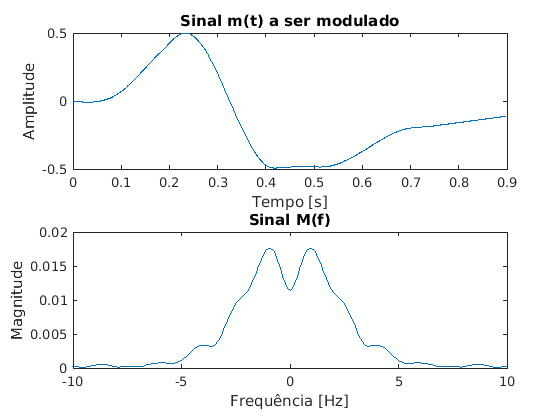

In [15]:
clc; clear all; close all;
load('./MATERIAL/HD_05/signal.mat')        % Abre o sinal a ser modulado
%% Espectro do sinal
lfft=length(msg)*10;                       % Comprimento da fft (Arbitrário)
fs=1/Ts;
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);         % Eixo de frequência 
msgfft=fft(msg,lfft)/lfft;                 % Calcula a FFT
msgfft=fftshift(msgfft);
% Gráfico no tempo
subplot(2,1,1);
plot(t,msg);
title('Sinal m(t) a ser modulado');
ylabel('Amplitude');
xlabel('Tempo [s]')
% Gráfico na frequência
subplot(2,1,2);
plot (freq ,abs(msgfft));
title('Sinal M(f)');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-10 10 0 0.02]);

**Passo 1:** Abra um script no Matlab, salve-o como **handson5_3.m** e escreva o seguinte código:

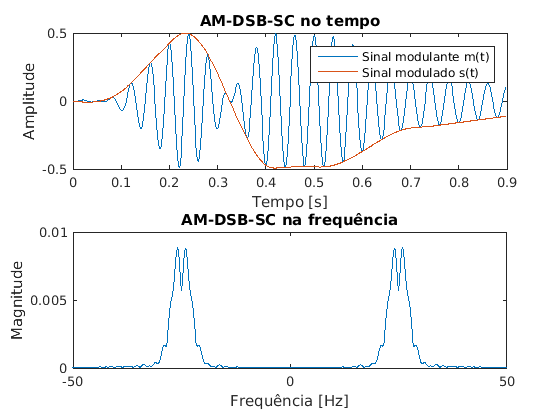

In [17]:
clc; clear all; close all;
load('./MATERIAL/HD_05/signal.mat')        % Abre o sinal a ser modulado
fs=1/Ts;                                   % Frequência de amostragem
Ac = 1;                                    % Amplitude da portadora
fc = 25;                                   % Frequência da portadora
c = Ac*cos(2*pi*fc*t);                     % Sinal portadora
s= c.*msg;                                 % Sinal AM-DSB-SC
%% Espectro do sinal
lfft=length(s)*10;                         % Comprimento da fft (Arbitrário)
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);         % Eixo de frequência 
Mfft=fft(s,lfft)/lfft;                     % Calcula a FFT
M_sig=fftshift(Mfft);                      % Posiciona a FFT no centro
% Gráfico do AM-DSB-SC e a mensagem no tempo
subplot(2,1,1);
plot (t,s,t,msg);
legend('Sinal modulante m(t)','Sinal modulado s(t)');
title('AM-DSB-SC no tempo');
ylabel('Amplitude');
xlabel('Tempo [s]');
% Gráfico AM-DSB-SC e a mensagem na frequência 
subplot(2,1,2);
plot (freq ,abs(M_sig));
title('AM-DSB-SC na frequência');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-50 50 0 0.01]);

Para fazer esse experimento em Python, precisaremos de uma função para abrir arquivos **.mat**. Usaremos a função **loadmat($\cdot$)** disponibilizada na biblioteca a SciPy, e mostraremos seu uso no código a seguir. A função **loadmat($\cdot$)** retorna um variável do tipo dicionário. Em python, dicionários associam um valor a uma chave (string), similar a uma estrutura no Matlab. Por exemplo:

> 'variavel' : 25

A chave 'variavel' corresponde ao inteiro 25.

Dessa forma, os valores (value) podem ser facilmente acessados pelas chaves (keys), como exemplificaremos no código a seguir.

dict_keys(['t', 'msg', '__version__', '__globals__', '__header__', 'Ts'])


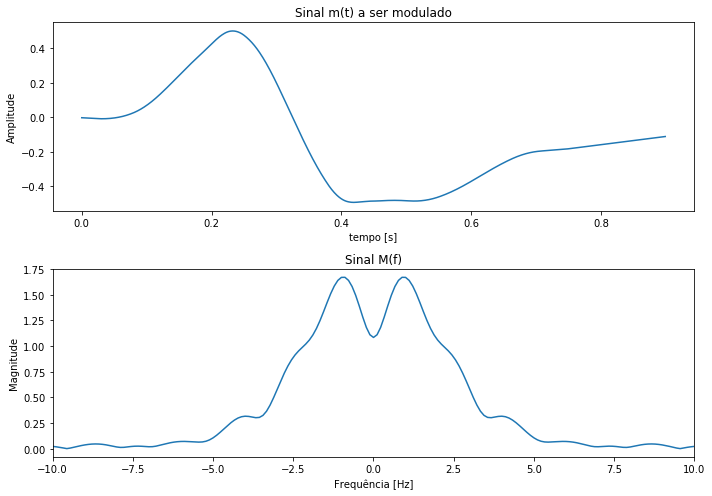

In [8]:
from scipy.io import loadmat
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
mat_data = loadmat('./MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
print(mat_data.keys())
t = mat_data['t'].flatten()
ts =  mat_data['Ts']
msg = mat_data['msg'].flatten()
fs = 1/ts
# Cálculo do espectro do sinal
lfft = len(msg)*10
freq = np.arange(-fs/2,fs/2,fs/lfft)
msgfft = np.fft.fft(msg,lfft)/np.sqrt(lfft)
msgfft= fftpack.fftshift(msgfft)
# Gráfico no tempo
plt.figure(1,[10,7])
plt.subplot(211)
plt.title("Sinal m(t) a ser modulado")
plt.ylabel("Amplitude")
plt.xlabel("tempo [s]")
plt.plot(t,msg)
# Gráfico na frequência
plt.figure(1,[10,7])
plt.subplot(212)
plt.title("Sinal M(f)")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")
plt.plot(freq,np.abs(msgfft))
plt.xlim([-10,10])

plt.tight_layout()
plt.show()

### Comentários sobre o código

- Para abrir o arquivo **signal.mat** usamos o seguinte código:
>```python
mat_data = loadmat('./MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
```

- Imprimimos todas as chaves (identificadores das variáveis) do arquivo com o seguinte código:
>```python
print(mat_data.keys())
```

- Finalmente, para acessar os valores das variáveis usamos sua chave. Nós acessamos os valores das variáveis *t*, *ts* e *msg* com o seguinte código:
>```python
t = mat_data['t'].flatten()
ts =  mat_data['Ts']
msg = mat_data['msg'].flatten()
```

- Um detalhe muito importante desse acesso é o método .flatten(), próprio dos vetores tipo numpy.ndarray ("padrão numpy"), que transforma um vetor de N dimensões para apenas uma. Fazendo isso, o usuário garante que os vetores serão 1-D no padrão Python (vetor linha), enquanto o padrão Matlab é vetor coluna.** Se a variável em questão for uma matriz, não se deve usar o .flatten().**

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_3.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

(9000,)


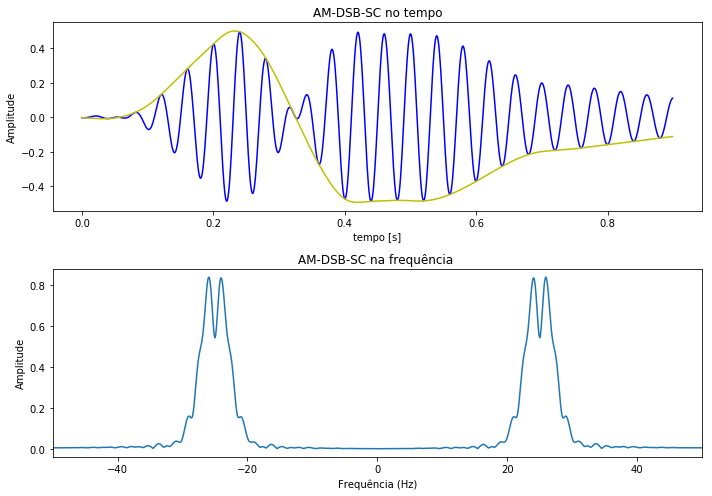

In [6]:
from scipy.io import loadmat
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
mat_data = loadmat('./MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
t = mat_data['t'].flatten()
ts =  mat_data['Ts']
msg = mat_data['msg'].flatten()
fs = 1/ts
Ac = 1                                                 # Amplitude da portadora
fc = 25                                                # Frequência da portadora
c = Ac*np.cos(2*np.pi*fc*t)                            # Sinal portadora
s = c*msg                                              # Sinal AM-DSB-SC
# Cálculo do espectro do sinal
lfft = len(s)*10
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(s,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
# Gráfico do sinal no tempo
plt.figure(1,[10,7])
plt.subplot(211)
plt.title("AM-DSB-SC no tempo")
plt.ylabel("Amplitude")
plt.xlabel("tempo [s]")
plt.plot(t,s,'b',t,msg,'y')
# Gráfico do espectro do sinal
plt.subplot(212)
plt.title("AM-DSB-SC na frequência ")
plt.ylabel("Amplitude")
plt.xlabel("Frequência (Hz)")
plt.plot(freq,np.abs(M_sig))
print(M_sig.shape)
plt.xlim([-50,50])
plt.tight_layout()
plt.show()

### Comentários sobre o código

- O sinal modulante (do arquivo **signal.mat**) tem largura de banda de aproximadamente 5 Hz e é modulado por uma portadora de 25 Hz;
- A modulação é simples e realizada por emio do seguinte trecho de código:
>```python
s= c*msg;  
```

- Considerando o sinal modulado $s(t)$ no tempo, vemos que o AM-DSB-SC não preseva o sinal $m(t)$ em sua envoltória;
- Já olhado para o sinal no domínio da frequência, nota-se novamente a formação de uma banda superior  (USB, Upper SideBand) e uma banda inferior (LSB, Lower SideBand) à 25 Hz (valor de $f_c$). Ambas bandas laterais tem largura de banda $B = 2 \cdot W = 10 $ Hz. Contudo, diferente do AM-DSB, a portadora não está presente no sinal $s(t)$.


# Prática 3: Demodulação AM-DSB-SC (detecção coerente) 

Diferente do AM-DSB, como o sinal modulante não se encontra na envoltória do sinal modulado, lançamos mão da demodulação coerente para recuperar o sinal modulante no AM-DSB-SC. A modulação coerente implica em termos um oscilador local no receptor e fazer seu uso para o processo de demodulação.

Demodular um sinal AM-DSB-SC em termos de código é simples, visto que basta multiplicar a portadora pelo sinal modulado e, em seguida, passar o sinal resultando por um filtro passa-baixa que teremos o sinal $m(t)$. Na prática, o atraso de propagação imprime uma fase aleatória ao sinal recebido, que precisa ser estimada e aplicada ao oscilador do receptor, para evitar distorção incontrolável no sinal demodulado (efeito nula de quadratura).

Esse experimento assumirá o perfeito sincronismo de fase entre transmissor e receptor, ficando fora do seu escopo o problema de estimar a fase no receptor (_carrier recovery_). Quem se interessar por esse assunto, uma boa maneira de começar a entender os problemas e as soluções clássicas é lendo o capítulo 10 do livro [Software Receiver Design: Build your Own Digital Communication System in Five Easy Steps](https://www.amazon.com/Software-Receiver-Design-Digital-Communication/dp/0521189446).

Assim, matematicamente falando, se o sinal AM-DSB-SC é $s(t) = m(t)\cdot c(t)$, a primeira etapa da demodulação AM-DSB-SC pode ser escrita como:

$$ m_r(t) = 2\cdot s(t)\cdot c(t) = 2 \cdot m(t) \cdot c^2(t)$$

Com $c(t) = A_c \cdot cos(2 \pi f_c t)$, temos:

$$ m_r(t) = 2 \cdot m(t) \cdot \frac{{A_c}^2}{2} \cdot [1 + cos(4\pi f_c t)] = {A_c}^2 \cdot m(t) +  {A_c}^2 \cdot m(t) \cdot cos(4\pi f_c t) $$

Fazendo $A_c = 1$, sem perda de generalidade, temos que a primeira etapa da demodulação AM-DSM-SC gera um sinal com uma componente em banda-base $\left ( m(t) \right)$ e uma componente em banda-pasante $\left ( m(t) \cdot cos(4\pi f_c t) \right)$, ficando:

$$ m_r(t) =  m(t) +  m(t) \cdot cos(4\pi f_c t) $$

Esse sinal ao ser submetido a um filtro passa-baixa (segunda etapa da demodulação), resulta em:

$$ m_rf(t) =  m(t) $$

Esse experimento tem o objetivo de mostrar essas etapas da demodulação AM-DSB-SC.

**Passo 1:** Abra um script no Matlab, salve-o como **handson5_4.m** e escreva o seguinte código:

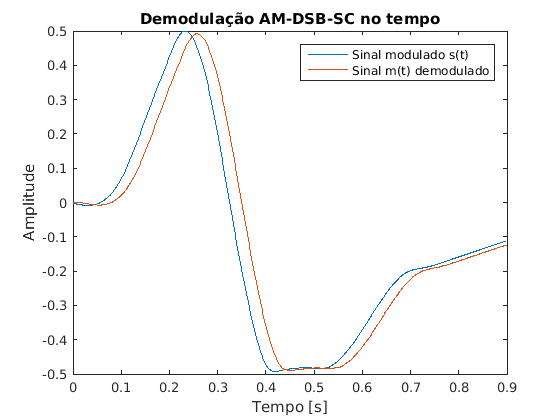

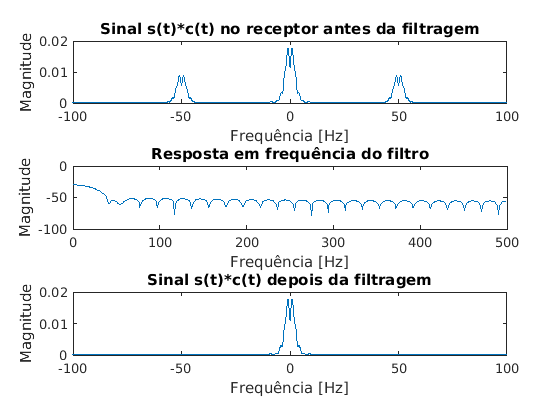

In [28]:
clc; clear all; close all;
load('./MATERIAL/HD_05/signal.mat')        % Abre o sinal a ser modulado
fs=1/Ts;                                   % Frequência de amostragem
Ac = 1;                                    % Amplitude da portadora
fc = 25;                                   % Frequência da portadora
c = Ac*cos(2*pi*fc*t);                     % Sinal portadora
s = c.*msg;                                % Sinal AM-DSB-SC

% Demodulação AM-DSB-SC
mr = 2*s.*c;

% Filtragem do sinal
B_m = 5;                                     % Banda do sinal
h=fir1(50,[B_m*Ts]);                         % Coeficientes do filtro
mr_filtrado=filter(h,1,mr);                 % Sinal filtrado

% Espectro do sinal antes da filtragem
subplot(3,1,1);
lfft=length(mr)*10;                         % Comprimento da fft (Arbitrário)
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);          % Eixo de frequência 
Mfft=fft(mr,lfft)/lfft;                     % Calcula a FFT
M_sig=fftshift(Mfft);                       % Posiciona a FFT no centro
plot (freq ,abs(M_sig));
title('Sinal s(t)*c(t) no receptor antes da filtragem');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-100 100 0 0.02]);                            

% Resposta em frequência do filtro
subplot(3,1,2);
[amp,freq] = freqz(h,fs);
plot(freq*fs/(2*pi),10*log10(abs(amp)));
title('Resposta em frequência do filtro');
ylabel('Magnitude');
xlabel('Frequência [Hz]');

% Espectro do sinal depois da filtragem
subplot(3,1,3);
lfft=length(mr_filtrado)*10;                         % Comprimento da fft (Arbitrário)
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);          % Eixo de frequência 
Mfft=fft(mr_filtrado,lfft)/lfft;                     % Calcula a FFT
M_sig=fftshift(Mfft);                       % Posiciona a FFT no centro
plot (freq ,abs(M_sig));
title('Sinal s(t)*c(t) depois da filtragem');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-100 100 0 0.02]);

figure;
% Gráfico do sinais modulante e demodulado
plot (t,msg,t,mr_filtrado);
legend('Sinal modulado s(t)','Sinal m(t) demodulado');
title('Demodulação AM-DSB-SC no tempo');
ylabel('Amplitude');
xlabel('Tempo [s]');

Para fazer esse experimento em Python, usaremos os mesmos artifícios de manipulação de arquivos que já aprendemos na prática anterior. Contudo, iremos importar a biblioteca **scipy.signal** para termos acesso a função **freqz** que calcula a resposta em frequência de um filtro.

**Passo 2:** Abra um script no Spyder, salve-o como **handson5_4.py** e escreva o seguinte código (se for rodar o código inline não esqueça de mudar do kernel do Matlab para o kernel do Python):

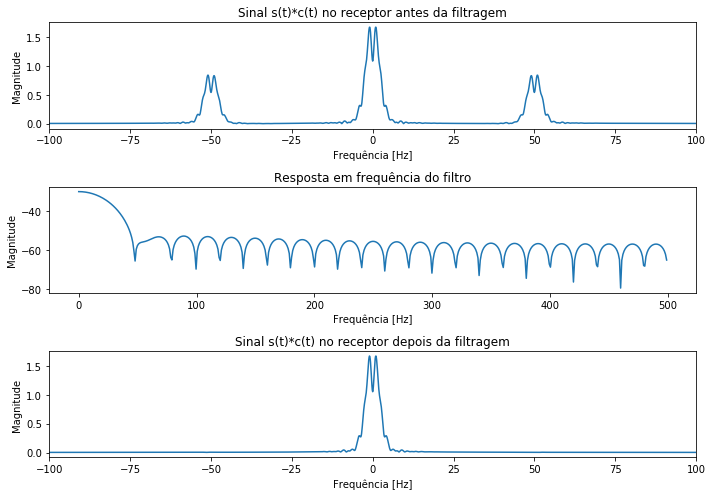

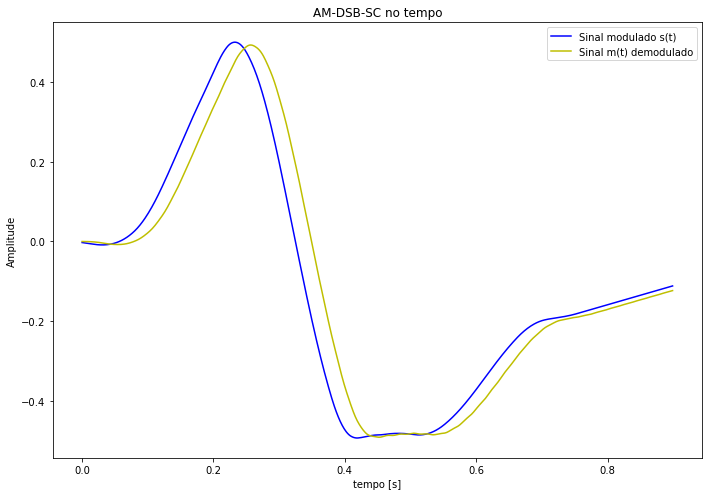

In [14]:
from scipy.io import loadmat
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy import signal

mat_data = loadmat('./MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
t = mat_data['t'].flatten()
ts =  float(mat_data['Ts'])
msg = mat_data['msg'].flatten()
fs = 1/ts
Ac = 1                                                 # Amplitude da portadora
fc = 25                                                # Frequência da portadora
c = Ac*np.cos(2*np.pi*fc*t)                            # Sinal portadora
s = c*msg                                              # Sinal AM-DSB-SC

# Demodulação AM-DSB-SC
mr = 2*s*c;

# Filtragem do sinal
nyq_rate = fs / 2.0
cutoff_hz = 10                                         # Banda do sinal
h=signal.firwin(50,cutoff_hz/nyq_rate)                 # Coeficientes do filtro
mr_filtrado=signal.lfilter(h,1,mr)                     # Sinal filtrado

# Espectro do sinal antes da filtragem
lfft = len(mr)*10                                      # Comprimento da fft (Arbitrário)
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(mr,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
# Gráfico do sinal no tempo
plt.figure(1,[10,7])
plt.subplot(311)
plt.title("Sinal s(t)*c(t) no receptor antes da filtragem")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")
plt.plot(freq ,abs(M_sig))
plt.xlim([-100,100])

# Resposta em frequência do filtro
plt.subplot(312)
[freq,amp] = freqz(h,fs)
plt.plot(freq*fs/(2*np.pi),10*np.log10(abs(amp)))
plt.title("Resposta em frequência do filtro")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")

# Espectro do sinal depois da filtragem
lfft = len(mr_filtrado)*10                                      # Comprimento da fft (Arbitrário)
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(mr_filtrado,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
plt.subplot(313)
plt.title("Sinal s(t)*c(t) no receptor depois da filtragem")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")
plt.plot(freq ,abs(M_sig))
plt.xlim([-100,100])
plt.tight_layout()
plt.show()

# Gráfico do sinais modulante e demodulado
plt.figure(1,[10,7])
plt.title("AM-DSB-SC no tempo")
plt.ylabel("Amplitude")
plt.xlabel("tempo [s]")
plt.plot(t,msg,'b',t,mr_filtrado,'y')
plt.legend(['Sinal modulado s(t)','Sinal m(t) demodulado']);
plt.tight_layout()
plt.show()

### Comentários sobre o código

- O código implementa a primeira etapa da demodulação AM-DSB (multiplicação do sinal modulado pela portadora) no seguinte trecho de código:
>```python
mr = 2*s.*c;
```

- A etapa de filtragem e recuperação do sinal é materializada no seguinte trecho de código:
>```python
B_m = 5;                                     % Banda do sinal
h=fir1(50,[B_m*Ts]);                         % Coeficientes do filtro
mr_filtrado=filter(h,1,mr);                  % Sinal filtrado
```
- O restante do código se destina a gerar o espectro do sinal antes de depois da filtragem, bem como a plotagem do sinal modulante e do sinais demodulado. Note que, ao não ser por um atraso causado pelo filtro, o sinal demodulado é idêntico ao sinal modulante.

# Prática 4: Modulação AM-SSB

Na modulação AM formam-se duas bandas laterais, como já comentado anteriormente, as quais as duas possuem a informação completa do sinal $m(t)$. Em consequência, para um sinal em banda base, a modulação AM-DSB requer o dobro de largura de banda necessário para a transmissão. Para melhorar a eficiência espectral de banda, bem como a de potência de transmissão, basta transmitir uma delas e filtrando a outra, resultando num novo tipo de transmissão AM-SSB. Além disso podemos remover a portadora do sinal, resultando n AM-DSB-SC. A demodulação do sinal AM-SSB-SC é exatamente a mesma de um sinal AM-DSB-SC. A grande vantagem da AM-SSB-SC está na economia de até 83% da potência de transmissão e em contra partida precisa-se de osciladores tão precisos quanto os da AM-DSB-SC.

No script abaixo é exemplificado o processo de modulação e demodulação da AM-SSB. Inicialmente modula-se a onda AM em DSB-SC e em seguida é feita a filtragem de frequências superiores (LSB) ou inferiores (USB) da onda DSB, formando AM-SSB.

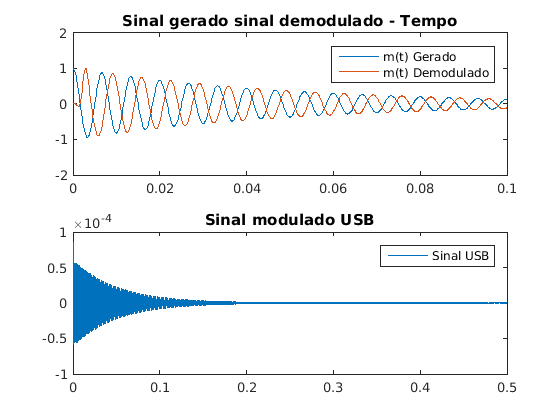

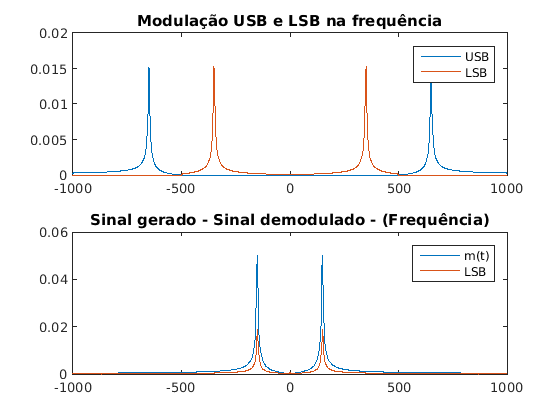

In [1]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ts=1e-4;                                                    % Período de amostragem
fs=1/Ts;                                                    % Frequencia de amostragem
t = [0:5e3]*Ts;                                             % Definição do vetor tempo
fc = 500;                                                   % Frequencia da portadora.
fm = 150;                                                   % Frequencia do sinal
Am=1;                                                       % Amplitude do sinal senoidal
Ac=1;                                                       % Amplitude da portadora
Mu = Am/Ac;                                                 % Indice de modulaçao.
carrier = Ac*cos(2*pi*fc*t);                                % Sinal portadora
m_t = Am*cos(2*pi*fm*t).*exp(-t*20);                        % Sinal mensagem
lmt = length(m_t);                                          % Comprimento do vetor mensagem
M_t = fftshift(fft(m_t,lmt)/lmt);                           % Sinal na frequência
freq_m = (-fs/2:fs/lmt:fs/2-fs/lmt);                        % Eixo da frequência para M_t
%% Modulação SSB
% Modulação DSB-SC
x_AM = m_t.*carrier;                                        % Onda Modulada DSB-SC no tempo
lfft = length(x_AM);                                        % Comprimento do sinal DSB-SC
lfft = 2^ceil(log2(lfft));                                  % Comprimento do sinal DSB-SC potência de dois ex(1001 --> 1024)
X_AM = fftshift(fft(x_AM,lfft)/lfft);                       % Onda Modulada AM-DSB-SC na Frequência
freq = (-fs/2:fs/lfft:fs/2-fs/lfft);                        % Eixo da frequência 
L_lsb = floor(fc*Ts*lfft);                                  % Local na frequência que se encontra a LSB.

% Filtragem da LSB
Filt_LSB = ones(1,lfft);                                    % Vetor filtro LSB (degrau) na frequencia 
Filt_LSB(lfft/2-L_lsb+1:lfft/2+L_lsb) = zeros(1,2*L_lsb);   % Definindo zeros na LSB
X_SSB_USB = X_AM.*Filt_LSB;                                 % Filtrando a frequência LSB

% Filtragem da USB
Filt_USB = zeros(1,lfft);                                   % Vetor filtro USB na frequencia
Filt_USB(lfft/2-L_lsb+1:lfft/2+L_lsb) = ones(1,2*L_lsb);    % Onde tinha 1 agora tem 0
X_SSB_LSB = X_AM.*Filt_USB;                                 % Filtrando a frequencia USB

%% Visualização SSB no tempo
% USB tempo
s_ssb_USB = real(ifft(fftshift(X_SSB_USB)));                % Inversa de fourrier
s_ssb_USB = s_ssb_USB (1:lmt);                              % Ajustando o comprimento do vetor

% LSB tempo
s_ssb_LSB = real(ifft(fftshift(X_SSB_LSB)));                % Inversa de fourrier
s_ssb_LSB = s_ssb_LSB (1:lmt);                              % Ajustando o comprimento do vetor

%% Demodulação
% Demodulação SSB-USB
s_dem_USB= s_ssb_USB.*carrier*2;                            % Multiplicação com a portadora em fase
B_m=1000;                                                   % Banda para filtragem 
h=fir1(50,[B_m*Ts]);                                        % Janelamento Hamming da banda
s_rec_USB=filter(h,1e-4,s_dem_USB);                         % Sinal filtrado

lfft=length(s_rec_USB);                                     % Comprimento do sinal recuperado
lfft=2^ceil(log2(lfft));                                    % Transformando para uma potencia de 2
SSB_freq_USB = fftshift(fft(s_rec_USB,lfft)/lfft);          % Sinal recuperado na frequencia
s_rec_USB = (max(m_t)/max(s_rec_USB))*s_rec_USB;            % Amplificando o sinal

% Demodulação SSB-LSB
s_dem_LSB= s_ssb_LSB.*carrier*2;                            % Multiplicação com a portadora em fase
B_m=1000;                                                   % Banda para filtragem 
h=fir1(50,[B_m*Ts]);                                        % Janelamento Hamming da banda
s_rec_LSB=filter(h,1e-4,s_dem_LSB);                         % Sinal filtrado

lfft=length(s_rec_LSB);                                     % Comprimento do sinal recuperado
lfft=2^ceil(log2(lfft));                                    % Transformando para uma potencia de 2
SSB_freq_LSB = fftshift(fft(s_rec_LSB,lfft)/lfft);          % Sinal recuperado na frequencia
s_rec_LSB = (max(m_t)/max(s_rec_LSB))*s_rec_LSB;            % Amplificando o sinal

%% Plotting
% Sinal na frequência 
subplot(2,1,1)
plot(freq,abs(X_SSB_USB),freq,abs(X_SSB_LSB))
legend('USB','LSB');
title ('Modulação USB e LSB na frequência')
axis([-1e3 1e3 0 0.02])

subplot(2,1,2)
plot(freq_m,abs(M_t),freq, abs(SSB_freq_USB))
title('Sinal gerado - Sinal demodulado - (Frequência)')
legend('m(t)','LSB');
axis([-1e3 1e3 0 0.06])
figure()
% Sinal no tempo
subplot(2,1,1)
plot(t,m_t,t,s_rec_USB)
axis([0 0.1 -2 2]);
title('Sinal gerado sinal demodulado - Tempo')
legend('m(t) Gerado','m(t) Demodulado');

subplot(2,1,2)
plot(t,s_ssb_USB)
title('Sinal modulado USB')
legend('Sinal USB');

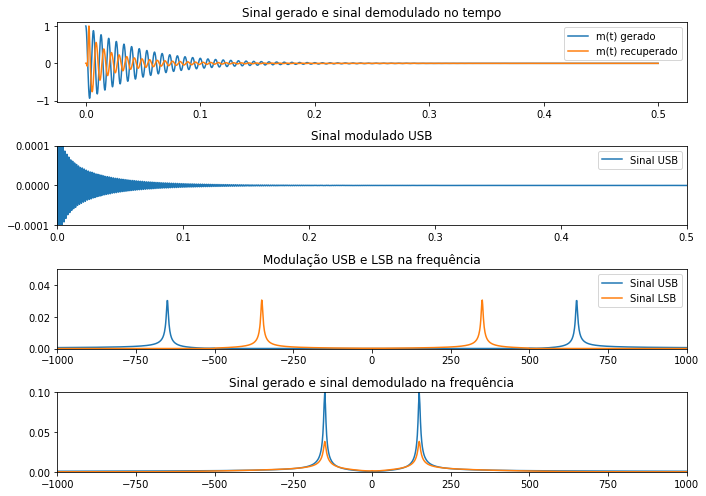

In [91]:
Ts=1e-4                                                    # Período de amostragem
fs=1/Ts                                                    # Frequencia de amostragem
t = np.arange(5e3)*Ts                                            # Definição do vetor tempo
fc = 500                                                   # Frequencia da portadora.
fm = 150                                                   # Frequencia do sinal
Am=1.0                                                       # Amplitude do sinal senoidal
Ac=1.0                                                       # Amplitude da portadora
Mu = Am/Ac                                                 # Indice de modulaçao.
carrier = Ac*np.cos(2*np.pi*fc*t)                                # Sinal portadora
m_t = Am*np.cos(2*np.pi*fm*t)*np.exp(-t*20)                        # Sinal mensagem
lmt = len(m_t)                                          # Comprimento do vetor mensagem
M_t = 2.0*np.abs(fftpack.fftshift(fftpack.fft(m_t,lmt)))/lmt          # Sinal na frequência
freq_m = np.arange(-fs/2,fs/2,fs/lmt)                  # Eixo da frequência para M_t

# Modulação SSB
# Modulação DSB-SC
x_AM = m_t*carrier                                        # Onda Modulada DSB-SC no tempo
lfft = len(x_AM)                                        # Comprimento do sinal DSB-SC
lfft = int(2**np.ceil(np.log2(lfft)))                                 # Comprimento do sinal DSB-SC potência de dois ex(1001 --> 1024)
X_AM = 2.0*np.abs(fftpack.fftshift(fftpack.fft(x_AM,lfft)))/lfft #Onda Modulada AM-DSB-SC na Frequência
freq = np.arange(-fs/2,fs/2,fs/lfft)                    # Eixo da frequência 
L_lsb = int(np.floor(fc*Ts*lfft))                       # Local na frequência que se encontra a LSB.

#filtragem da LSB
Filt_LSB = np.ones(lfft)                                    #Vetor filtro LSB (degrau) na frequencia 
Filt_LSB[lfft//2-L_lsb:lfft//2+L_lsb] = np.zeros(2*L_lsb)   # Definindo zeros na LSB
X_SSB_USB = X_AM*Filt_LSB                                 # Filtrando a frequência LSB

#filtragem da USB
Filt_USB = np.zeros(lfft)                                    #Vetor filtro USB na frequencia  
Filt_USB[lfft//2-L_lsb:lfft//2+L_lsb] = np.ones(2*L_lsb)   # DOnde tinha 1 agora tem 0
X_SSB_LSB = X_AM*Filt_USB                                 # Filtrando a frequência USB

#filtragem da USB
## Visualização SSB no tempo
# USB tempo
s_ssb_USB = np.real(fftpack.ifft(fftpack.fftshift(X_SSB_USB)))        # Inversa de fourrier
s_ssb_USB = s_ssb_USB[:lmt]                      # Ajustando o comprimento do vetor

# LSB tempo
s_ssb_LSB =  np.real(fftpack.ifft(fftpack.fftshift(X_SSB_LSB)))     # Inversa de fourrier
s_ssb_LSB = s_ssb_LSB[:lmt]                  # Ajustando o comprimento do vetor

# Demodulação
# Demodulação SSB-USB
from scipy import signal

s_dem_USB= s_ssb_USB*carrier*2                            # Multiplicação com a portadora em fase
B_m=1000                                                   # Banda para filtragem 
h=signal.firwin(50,B_m*Ts)                                  # Janelamento Hamming da banda
s_rec_USB=signal.lfilter(h,1e-4,s_dem_USB)                         # Sinal filtrado
#o que a filter faz?
lfft=len(s_rec_USB)                                     # Comprimento do sinal recuperado
lfft=int(2**np.ceil(np.log2(lfft)))                                    # Transformando para uma potencia de 2
SSB_freq_USB = fftpack.fftshift(fftpack.fft(s_rec_USB,lfft)/lfft)          # Sinal recuperado na frequencia
s_rec_USB = (max(m_t)/max(s_rec_USB))*s_rec_USB            # Amplificando o sinal

# Demodulação SSB-LSB
s_dem_LSB= s_ssb_LSB*carrier*2;                            # Multiplicação com a portadora em fase
B_m=1000                                                   # Banda para filtragem 
h=signal.firwin(50,B_m*Ts)                              # Janelamento Hamming da banda
s_rec_LSB =signal.lfilter(h,1e-4,s_dem_LSB)                         # Sinal filtrado

lfft=len(s_rec_LSB)                                     # Comprimento do sinal recuperado
lfft=int(2**np.ceil(np.log2(lfft)))                                    # Transformando para uma potencia de 2
SSB_freq_LSB = fftpack.fftshift(fftpack.fft(s_rec_LSB,lfft)/lfft)          # Sinal recuperado na frequencia
s_rec_LSB = (max(m_t)/max(s_rec_LSB))*s_rec_LSB            # Amplificando o sinal


plt.figure(1,[10,7])
plt.subplot(411)
plt.title("Sinal gerado e sinal demodulado no tempo")
plt.plot(t,m_t,t,s_rec_USB)
#plt.xlim([0.0,0.1])
#plt.ylim([-2,2])
plt.legend(["m(t) gerado","m(t) recuperado"])

plt.subplot(412)
plt.title("Sinal modulado USB")
plt.plot(t,s_ssb_USB)
plt.legend(["Sinal USB"])
plt.ylim([-1e-4,1e-4])
plt.xlim([0,0.5])

plt.subplot(413)
plt.title("Modulação USB e LSB na frequência")
plt.plot(freq,(X_SSB_USB),freq,(X_SSB_LSB)) #normalização feita no meio do código
plt.xlim([-1e3,1e3])
plt.ylim([0.0,0.05])
plt.legend(["Sinal USB","Sinal LSB"])

plt.subplot(414)
plt.title("Sinal gerado e sinal demodulado na frequência")
plt.plot(freq_m,M_t,freq,2.0*np.abs(SSB_freq_USB)) #divisão por len(...) feita no código
plt.xlim([-1e3,1e3])
plt.ylim([0.0,0.1])


plt.tight_layout()
plt.show()

### QAM 
#### Sinal no tempo e frequência:
Gerar uma onda AM-DSB-Sc torna-se complicado a medida que necessita-se de filtros (passa baixa ou passa alta) de extrema precisão para que este elimine a frequência, por exemplo, LSB totalmente sem prejudicar na frequência USB. Por isso o uso de modulação em amplitude em quadratura (QAM) torna-se uma solução viável, sendo gerada com exatidão sem exigência de filtros extremamente precisos.

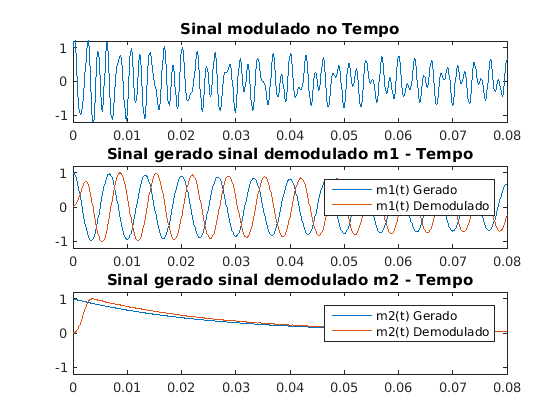

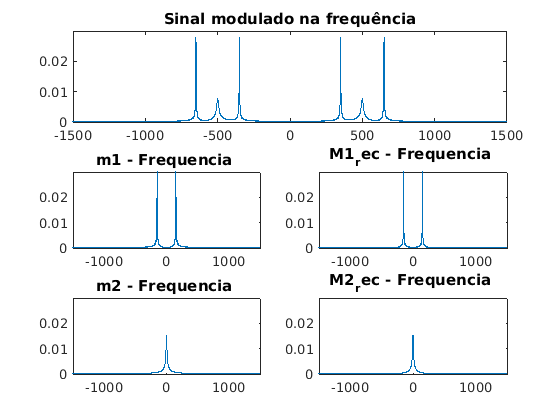

In [3]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ts=1e-4;                                                    % Período de amostragem
fs=1/Ts;                                                    % Frequencia de amostragem
t = [0:5e3]*Ts;                                             % Definição do vetor tempo
fc = 500;                                                   % Frequencia da portadora.
fm = 150;                                                   % Frequencia do sinal
Am=1;                                                       % Amplitude do sinal senoidal
Ac=1;                                                       % Amplitude da portadora
Mu = Am/Ac;                                                 % Indice de modulaçao.
carrierc = Ac*cos(2*pi*fc*t);                               % Sinal portadora cosseno
carriers = Ac*sin(2*pi*fc*t);                               % Sinal portadora seno
m1_t = Am*cos(2*pi*fm*t).*exp(-t*5);                        % Sinal mensagem
m2_t = Am*exp(-t*40);                                       % Sinal mensagem
B_m=150;                                                    % Banda para filtragem 
h=fir1(40,[B_m*Ts]);                                        % Janelamento Hamming da banda
lfft = length(t);                                           % FFT com o mesmo comprimento do sinal (t , m1_t e m2_t)
lfft = 2^ceil(log2(lfft)+1);                                % Comprimento da FFT em potência de 2
freqm = (-fs/2:fs/lfft:fs/2-fs/lfft);                       % Eixo da frequência 
M1 = fftshift(fft(m1_t,lfft)/lfft);                         % Sinal m1_t na frequência
M2 = fftshift(fft(m2_t,lfft)/lfft);                         % Sinal m2_t na frequência
%% Modulação QAM
% Modulação - Soma de duas DSB-SC ortogonais
x_qam = (m1_t).*(carrierc)+(m2_t).*(carriers);              % Sinal QAM no tempo
% Sinal na frequência 
lfft = length(t);                                           % FFT com o mesmo comprimento do sinal (t , m1_t e m2_t)
lfft = 2^ceil(log2(lfft)+1);                                % Comprimento da FFT em potência de 2
X_QAM=fftshift(fft(x_qam,lfft)/lfft);                       % Sinal QAM na frequência
freqm = (-fs/2:fs/lfft:fs/2-fs/lfft);                       % Eixo da frequência 

%% Demodulação
% Separando sinais
m1_dem = x_qam.*cos(2*pi*fc*t)*2;                           % Demodulando m1_t
m2_dem = x_qam.*sin(2*pi*fc*t)*2;                           % Demodulando m2_t
M1_dem = fftshift(fft(m1_dem,lfft)/lfft);                   % m1_t na frequência com portadora
M2_dem = fftshift(fft(m2_dem,lfft)/lfft);                   % m2_t na frequência com portadora

% Filtro passa baixa
m1_rec=filter(h,1,m1_dem);                                  % Filtrando m1_dem em Hamming
M1_rec=fftshift(fft(m1_rec,lfft)/lfft);                     % Calculando o sinal recebido m1_rec na frequência
m2_rec=filter(h,1,m2_dem);                                  % Filtrando m2_dem em Hamming
M2_rec=fftshift(fft(m2_rec,lfft)/lfft);                     % Calculando o sinal recebido m2_rec na frequência
m1_rec = (max(m1_t)/max(m1_rec))*m1_rec;                    % Amplificando o sinal m1_rec
m2_rec = (max(m1_t)/max(m2_rec))*m2_rec;                    % Amplificando o sinal m2_rec

%% Plotting
% Sinal m1_t e m2_t na frequência
subplot(3,2,[1,2])
plot(freqm,abs(X_QAM))
title('Sinal modulado na frequência')
axis([-1500 1500 0 0.03 ])

subplot(3,2,3)
plot(freqm,abs(M1))
title('m1 - Frequencia ')
axis([-1500 1500 0 0.03 ])

subplot(3,2,4)
plot(freqm,abs(M1_rec))
title('M1_rec - Frequencia ')
axis([-1500 1500 0 0.03 ])

subplot(3,2,5)
plot(freqm,abs(M2))
title('m2 - Frequencia ')
axis([-1500 1500 0 0.03 ])

subplot(3,2,6)
plot(freqm,abs(M2_rec))
title('M2_rec - Frequencia ')
axis([-1500 1500 0 0.03 ])

figure()
% Sinal m1_t e m2_t no tempo
subplot(3,1,1)
plot (t,x_qam)    
title('Sinal modulado no Tempo')
axis([0 0.08 -1.2 1.2 ])

subplot(3,1,2)
plot (t,m1_t,t,m1_rec)    
title('Sinal gerado sinal demodulado m1 - Tempo')
legend('m1(t) Gerado','m1(t) Demodulado');
axis([0 0.08 -1.2 1.2 ])

subplot(3,1,3)
plot (t,m2_t,t,m2_rec)    
title('Sinal gerado sinal demodulado m2 - Tempo')
legend('m2(t) Gerado','m2(t) Demodulado');
axis([0 0.08 -1.2 1.2 ])

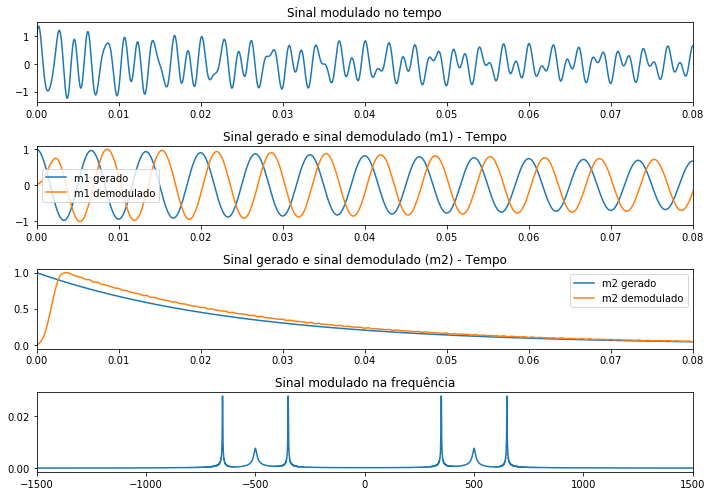

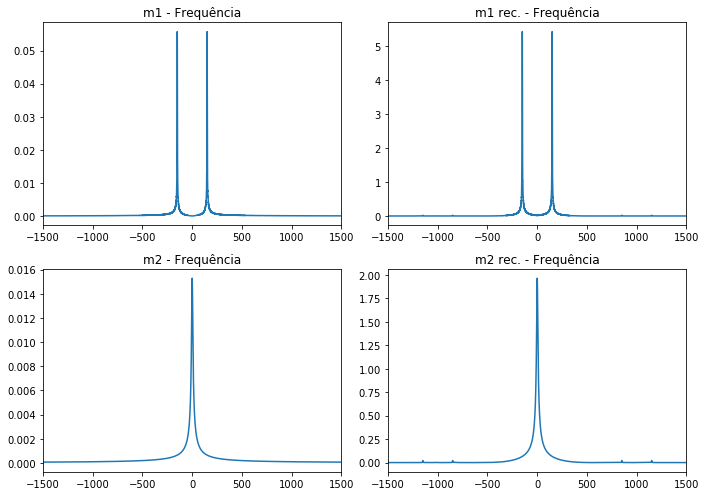

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.fftpack as ff
from scipy import signal
ts = 1e-4
fs = 1/ts
t = np.arange(0,5000,1)*ts
fc = 500
fm = 150                                                   # Frequencia do sinal
Am=1                                                     # Amplitude do sinal senoidal
Ac=1                                                      # Amplitude da portadora
Mu = Am/Ac
carrierc = Ac*np.cos(2*np.pi*fc*t)                               # Sinal portadora cosseno
carriers = Ac*np.sin(2*np.pi*fc*t)                               # Sinal portadora seno
m1_t = Am*np.cos(2*np.pi*fm*t)*np.exp(-t*5)                        # Sinal mensagem
m2_t = Am*np.exp(-t*40)                                       # Sinal mensagem
B_m=150                                                    # Banda para filtragem 
from spectrum.window import Window #módulo para gerar a janela hamming
h = Window(40, name= 'hamming')

lfft = len(t)       # FFT com o mesmo comprimento do sinal (t , m1_t e m2_t)
lfft = int(2**np.ceil(np.log2(lfft)+1))
freqm = np.arange(-fs/2,fs/2,fs/lfft)
M1 = ff.fftshift(ff.fft(m1_t,lfft))/lfft                     # Sinal m1_t na frequência
M2 = ff.fftshift(ff.fft(m2_t,lfft))/lfft                      # Sinal m2_t na frequência

# Modulação QAM
# Modulação - Soma de duas DSB-SC ortogonais
x_qam = (m1_t)*(carrierc)+(m2_t)*(carriers)              # Sinal QAM no tempo
# Sinal na frequência
X_QAM=ff.fftshift(ff.fft(x_qam,lfft,axis=0)/lfft)      #Sinal QAM na frequência
# Demodulação
# Separando os sinais
m1_dem = x_qam*np.cos(2*np.pi*fc*t)*2                  # Demodulando m1_t
m2_dem = x_qam*np.sin(2*np.pi*fc*t)*2                  # Demodulando m2_t

M1_dem = ff.fftshift(ff.fft(m1_dem,lfft)/np.sqrt(lfft))        # m1_t na frequência com portadora
M2_dem = ff.fftshift(ff.fft(m2_dem,lfft)/np.sqrt(lfft))       #m2_t na frequência com portadora

# Filtro passa-baixas com hamming
#geração do filtro
a = 1 #numerador
b = signal.firwin(40, cutoff=B_m*ts, window='hamming') #denominador
m1_rec=signal.lfilter(b,a,m1_dem)         # Filtrando m1_dem em Hamming, a ordem é b,a mesmo
M1_rec=ff.fftshift(ff.fft(m1_rec,lfft)/np.sqrt(lfft))    # Calculando o sinal recebido m1_rec na frequência
m2_rec=signal.lfilter(b,a,m2_dem)         # Filtrando m2_dem em Hamming
M2_rec=ff.fftshift(ff.fft(m2_rec,lfft)/np.sqrt(lfft))# Calculando o sinal recebido m2_rec na frequência
m1_rec = (max(m1_t)/max(m1_rec))*m1_rec   # Amplificando o sinal m1_rec
m2_rec = (max(m1_t)/max(m2_rec))*m2_rec   # Amplificando o sinal m2_rec

#Plotagem
plt.figure(1,[10,7])
plt.subplot(411)
plt.title("Sinal modulado no tempo")
plt.plot(t,x_qam)
plt.xlim([0,0.08])

plt.subplot(412)
plt.title("Sinal gerado e sinal demodulado (m1) - Tempo")
plt.plot(t,m1_t,t,m1_rec)
plt.legend(["m1 gerado","m1 demodulado"])
plt.xlim([0,0.08])

plt.subplot(413)
plt.title("Sinal gerado e sinal demodulado (m2) - Tempo")
plt.plot(t,m2_t,t,m2_rec)
plt.legend(["m2 gerado","m2 demodulado"])
plt.xlim([0,0.08])

plt.subplot(414)
plt.title("Sinal modulado na frequência")
plt.plot(freqm,np.abs(X_QAM))
plt.xlim([-1500,1500])

plt.tight_layout()
plt.show()

plt.figure(2,[10,7])
plt.subplot(221)
plt.title("m1 - Frequência")
plt.plot(freqm,np.abs(M1))
plt.xlim([-1500,1500])

plt.subplot(222)
plt.title("m1 rec. - Frequência")
plt.plot(freqm,np.abs(M1_rec))
plt.xlim([-1500,1500])

plt.subplot(223)
plt.title("m2 - Frequência")
plt.plot(freqm,np.abs(M2))
plt.xlim([-1500,1500])

plt.subplot(224)
plt.title("m2 rec. - Frequência")
plt.plot(freqm,np.abs(M2_rec))
plt.xlim([-1500,1500])

plt.tight_layout()
plt.show()

## Frequence Modulation
Sinais FM variam sua frequência instantânea linearmente com o sinal $m(t)$ de froma que:

$$ f_{i}(t)=f_{c}+K_{f}m(t)$$

Onde $k_{f} $ é a sensibilidade de frequência do sinal e $f_{i}(t)$ é a frequência instantânea. Logo, podemos expressar uma onda FM da seguinte forma:

$$ S_{FM}(t) = A_{c}\cdot cos[\omega_{c}\cdot t +2\pi k_{f} \int_{0}^{t}m(\tau)\cdot d\tau ]$$

Sendo a amplitude constante, podemos calcular a potência do sinal como:

$$P_{med}= \frac{A^2}{2} $$

Em FM, nenhuma das propriedades da transformada de Fourrier podem ser aplicadas. Para determinar a banda de frequência a partir da equação de frequência instantânea definiremos: 

$$ f_{i}(t)=f_{c}+\Delta f\cdot cos(2\pi f_{m}t)$$

Sendo $\Delta f = K_{f}A_{m}$ o desvio de frequência.

As vantagens de usar FM tornam-se visível quanto a melhor descriminação de ruido devido a sua amplitude constante (ruido menos prejudicial) alem de que como é modulado em altas frequências (veremos o porquê adiante), é necessário dimensões menores de antenas. Em contrapartida a modulação FM requer maior largura de banda em relação a modulação AM além de uma maior complexidade no receptor e no emissor.

A informação contida em sinais FM reside na frequência instantânea deste de forma que:


<img src = "./handsOn6_matlab_figs/s_t.png " width="700" height="200">

Sendo 
$$V(t)=\frac{dS(t)}{dt}$$
Desenvolvendo a equação acima temos que:

$$ V(t)= A_{c}[2 \pi f_{c} + 2 \pi k_{f} m(t) ] \cdot sen[2 \pi f_{c} t+ 2 \pi k_{f} \int_{0}^{t}m(\tau)d\tau]    $$
sendo:
$$ V_{AM}(t)=  A_{c}[2 \pi f_{c} + 2 \pi k_{f} m(t) ]  $$
$$ V_{FM}(t)=  sen[2 \pi f_{c} t+ 2 \pi k_{f} \int_{0}^{t}m(\tau)d\tau] $$


E então, com um circuito diferenciador, transformamos nosso sinal FM em um sinal AM, então podemos demodular o sinal de saida com o mesmo circuito de um AM-DSB recupera-se a mensagem $m(t)$.

Neste experimento faremos a demodulação com um diferenciador ideal. Para essa simulação de FM, faremos uso da função 'diff' que retorna a diferença entre os pontos adjacentes do vetor análoga a derivada em tempo contínuo. Por exemplo, seja um sinal $x$ no tempo dado por:

In [8]:
t=0:1:10;
x=5*t+2;
dx = diff(x)


dx =

     5     5     5     5     5     5     5     5     5     5



Perceba que se o vetor x tem N componentes o vetor dx terá N-1. Isso ocorre porque a função diff retorna [x(i+1)-x(i)] para todos os elementos, resultando então em N-1 elementos.
No script abaixo faremos a repetição do elemento s_fm(1) para que quando usemos a função diff tenhamos um vetor com o mesmo número de elementos.

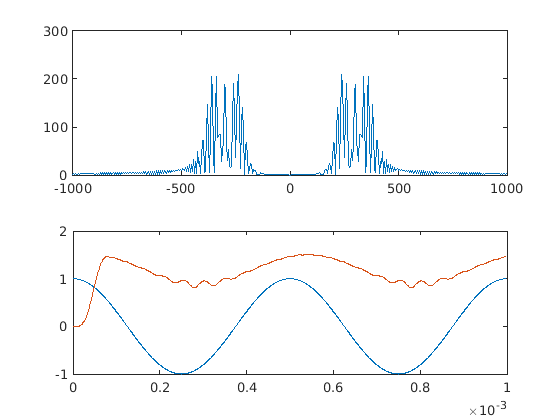

In [11]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
t = [0:999]*1e-6;                                               % Definição do vetor tempo
ts=1e-4;                                                        % Definiçao do periodo de amostragem
lfft=length(t);                                                 % Comprimento do vetor t
lfft=2^ceil(log2(lfft));                                        % Transforma o comprimento em potência de 2
m_sig=cos(2*pi*2000*t);                                         % Sinal no tempo
M_freq =fftshift(fft(m_sig,lfft));                              % Sinal na frequência
freqm=(-lfft/2:lfft/2-1)/(lfft*ts);                             % Eixo da frequência
B_m=100;                                                        % largura de banda 100 lateral
h=fir1(80,[B_m*ts]);                                            % Janelamento Hamming

%% Modulação
% Montando o sinal FM no tempo
kf=160*pi;                                                      % Sensibilidade de frequencia 
m_intg=kf*ts*cumsum(m_sig);                                     % Sinal mensagem com Kf
s_fm=cos(2*pi*30000*t+m_intg);                                  % Sinal portadora com m(t)
% Visualizando o sinal na freuqência
lfft=length(t);                                                 % Compriemnto da FFT
lfft=2^ceil(log2(lfft)+1);                                      % Lfft na potencia mais proxima de 2
S_fm=fftshift(fft(s_fm,lfft));                                  % FFT do sinal
freq=(-lfft/2:lfft/2-1)/(lfft*ts);                              % Eixo da frequência

%% Demodulação

s_fmdem=diff([s_fm(1) s_fm])/(ts*kf);                           % Diferenciador repetindo o primeiro elemento 
s_fmrec=s_fmdem.*(s_fmdem>0);                                   % Parte positiva do sinal 
s_dec=filter(h,1,s_fmrec);                                      % Filtro passa baixa em 200Hz de banda

%% Plotting 
subplot(2, 1, 1)
plot(freq,abs(S_fm))
axis([-1000 1000 0 300])

subplot(2 ,1, 2)
plot(t,m_sig,t,s_dec)

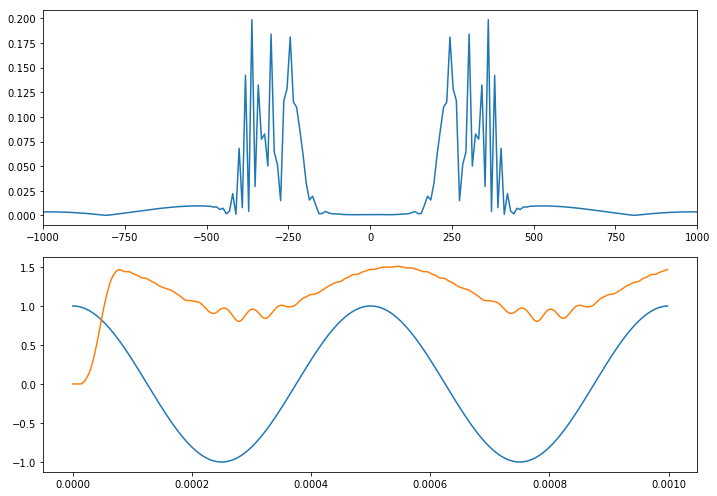

In [5]:
import numpy as np
import scipy.fftpack as ff
from scipy import signal
t = np.arange(0,999,1)*1e-6        # Definição do vetor tempo
ts=1e-4                                     # Definiçao do periodo de amostragem
lfft=len(t)                                  # Comprimento do vetor t
lfft=int(2**np.ceil(np.log2(lfft)))                      # Transforma o comprimento em potência de 2
m_sig=np.cos(2*np.pi*2000*t)                        # Sinal no tempo
M_freq =ff.fftshift(ff.fft(m_sig,lfft,axis=0))/lfft       # Sinal na frequência
freqm=np.arange(-lfft/2,lfft/2,1)/(lfft*ts)              # Eixo da frequência
B_m=100                                          # largura de banda 100 lateral
b=signal.firwin(80,B_m*ts,window='hamming')                  # Janelamento Hamming
a=1
# Modulação
# Montando o sinal FM no tempo
kf=160*np.pi;                                    # Sensibilidade de frequencia 
m_intg=kf*ts*np.cumsum(m_sig)                     # Sinal mensagem com Kf
s_fm=np.cos(2*np.pi*30000*t+m_intg)                # Sinal portadora com m(t)
# Visualizando o sinal na freuqência
lfft=len(t);                                     # Comprimento da FFT
lfft=int(2**np.ceil(np.log2(lfft)))                         # Lfft na potencia mais proxima de 2
S_fm=ff.fftshift(ff.fft(s_fm,lfft))/lfft             # FFT do sinal
freqm=np.arange(-lfft/2,lfft/2,1)/(lfft*ts)             # Eixo da frequência

# Demodulação
s_fm_aux = np.concatenate(([s_fm[0]],s_fm),axis=0)
s_fmdem=np.diff(s_fm_aux)/(ts*kf)       # Diferenciador repetindo o primeiro elemento 
s_fmrec=np.select([s_fmdem>0],[s_fmdem])  # Parte positiva do sinal 
s_dec=signal.lfilter(b,a,s_fmrec)        # Filtro passa baixa em 200Hz de banda
import matplotlib.pyplot as plt

plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(freqm,np.abs(S_fm))
plt.xlim([-1000,1000])

plt.subplot(212)
plt.plot(t,m_sig,t,s_dec)

plt.tight_layout()
plt.show()

O resultado da demodulação FM mostra-se distorcido primeiramente com atrasos e em baixas amplitudes ocorre maior distorção. Isso ocorre porque quando o sinal da mensagem é negativo a frequência instantânea é baixa, causando mais distorções. Esse efeito é despresível quando se trata de frequências altas como na ordem de $10^{6}$Hz sendo assim possível a transmissão FM apenas em alta frequência.

### Transformada de Hilbert
O conceito de amplitude/fase/freqüência instantânea é fundamental para a comunicação de informações e aparece em muitas aplicações em processamento de sinais. Sabemos que um sinal da forma $$ x(t) = Am \cdot cos (\omega t + \phi)$$ Não carrega consigo nenhuma informação. Para que isso ocorra, é necessário que o sinal seja modulado. 

Seja x(t) um sinal modulado qualquer (Fm, Pm, Am ...):
$$x(t)= a(t) \cdot cos(\phi(t))$$
Entende-se $a(t)$ como amplitude instantânea do sinal e $\phi (t)$ como sua frequência. Podemos calcular também a frequência angular instantânea como:
$$ f(t) = \frac {1} {2 \pi } \frac {d \phi (t)}{dt} $$

Então seja um sinal real $x(t)$ qualquer, podemos extrair a informação $m(t)$ dele aplicando a transformada de Hilbert no sinal recebido tanto para modulação em ângulo quanto para a modulação em amplitude. Aplicando a transformada de Hilbert podemos calcular facilmente o sinal $m(t)$ no plano complexo.
![Figura01](./handsOn6_matlab_figs/Hilbert_Transform.png)

 Sendo 
 
 $$ Z(t)= Z_{r}(t)+j Z_{im}(t) = x(t) + j H \left [ x(t) \right ]$$
 
 Em que H[x(t)] representa a transformada de Hilbert em x(t).
 

- Para a informação em ângulo:

$$ \phi (t) = \angle Z(t) = arctan \left ( \frac{Z_{im}(t)}{Z_{r}(t)} \right ) $$

- Para a informação em amplitude:

$$ a(t) = \left |Z(t)  \right | = \sqrt{Z_{im}^{2}(t)+Z_{r}^{2}(t)}$$
No script abaixo foi feito a simulação em AM-DSB usando a tranformada de Hilbert para decompor completamente um sinal $m(t)$.

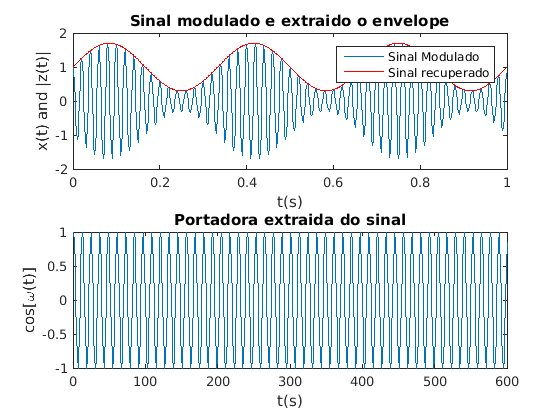

In [1]:
clc; clear all; close all;
%% Parâmetros da onda
fs = 600;                                           % Frequencia de amostragem 
t = 0:1/fs:1-1/fs;                                  % Eixo do tempo
m_t = 1+0.7 * sin(2*pi*3*t) ;                       % Sinal m(t)
c_t =cos(2*pi*50*t);                                % Sinal portadora
s_t = m_t .* c_t;                                   % Sinal Modulado em AM-DSB-SC

%% Calcula a transformada de Hilbert 
z = hilbert(s_t);                                   % Forma analítica (real + imaginario)
inst_amplitude = abs(z);                            % Amplitude instantânea
inst_phase = angle(z);                              % Fase instantânea
inst_freq = diff(inst_phase)/(2*pi)*fs;             % Frequência instantânea                                            
regenerated_carrier = cos(inst_phase);              % Regenerando a portadora 

%% Plotting
% Plota o sinal AM e detector de envelope
subplot(2,1,1); 
plot(t,s_t);
hold on;
plot(t,inst_amplitude,'r');                           
title('Sinal modulado e extraido o envelope');
legend('Sinal Modulado','Sinal recuperado');
xlabel('t(s)'); 
ylabel('x(t) and |z(t)|');
% Plota portadora recuperada
subplot(2,1,2); 
plot(cos(inst_phase));
title('Portadora extraida do sinal'); 
xlabel('t(s)'); 
ylabel('cos[\omega(t)]');

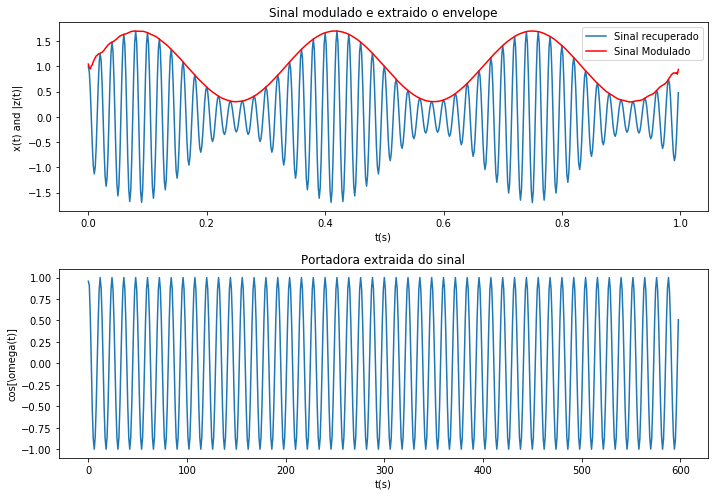

In [95]:
# Parâmetros da onda
import numpy as np
fs = 600                                          # Frequencia de amostragem 
t = np.arange(0,1-1/fs,1/fs)                                  # Eixo do tempo
m_t = 1+0.7 *np.sin(2*np.pi*3*t)                       # Sinal m(t)
c_t =np.cos(2*np.pi*50*t)                                # Sinal portadora
s_t = m_t * c_t                                  # Sinal Modulado em AM-DSB-SC

# Calcula a transformada de Hilbert 
from scipy.signal import hilbert
z = hilbert(s_t)                                   # Forma analítica (real + imaginario)
inst_amplitude = np.abs(z)                            # Amplitude instantânea
inst_phase = np.angle(z)                              # Fase instantânea
inst_freq = np.diff(inst_phase)/(2*np.pi)*fs             # Frequência instantânea                                            
regenerated_carrier = np.cos(inst_phase)              # Regenerando a portadora 

# Plotting
# Plota o sinal AM e detector de envelope
import matplotlib.pyplot as plt
plt.figure(1,[10,7])
plt.subplot(211) 
plt.plot(t,s_t)
plt.plot(t,inst_amplitude,'r')                           
plt.title('Sinal modulado e extraido o envelope')
plt.legend(['Sinal recuperado','Sinal Modulado'])
plt.xlabel('t(s)') 
plt.ylabel('x(t) and |z(t)|')
# Plota portadora recuperada
plt.subplot(212) 
plt.plot(np.cos(inst_phase))
plt.title('Portadora extraida do sinal') 
plt.xlabel('t(s)')
plt.ylabel('cos[\omega(t)]')

plt.tight_layout()
plt.show()

No script abaixo foi feito a simulação em FM usando a tranformada de Hilbert para decompor completamente um sinal $m(t)$.

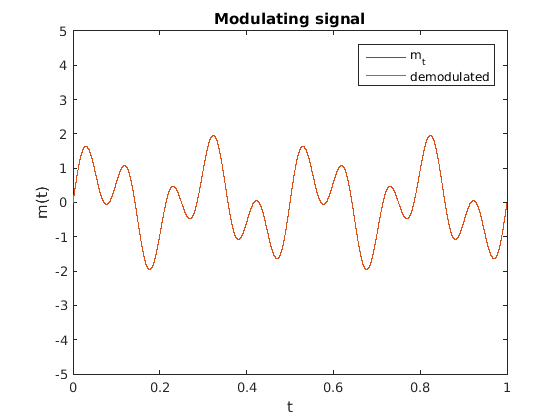

In [6]:
clc;clear all;close all;
%% Parâmetros da onda
fc = 6000;                                              % Frequência da portadora
fm = 10;                                                % Frequência do sinal
Am = 1;                                                 % Amplitude do sinal 
Theta = pi/4;                                           % Fase do sinal
Beta = pi/5;                                            % Fase da portadora
Fs = 8*fc;                                              % Frequência de amostragem
duration = 0.5;                                         % Tempo final
t = 0:1/Fs:1-1/Fs;                                      % Eixo do tempo
 
m_t = Am*sin(2*pi*fm*t)+Am*sin(2*pi*0.4*fm*t);                                % Sinal em banda base
kf=160*pi;                                              % Sensibilidade de frequencia 
m_intg=kf*1/Fs*cumsum(m_t);                             % Somatório com Kf
x = cos(2*pi*fc*t +m_intg );                            % Sinal modulado

%% Hilbert
z= hilbert(x);                                          % Forma analítica (real + imaginario)
inst_phase = unwrap(angle(z));                          % Fase instantânea com ajuste para variaçoes bruscas de angulo
p = polyfit(t,inst_phase,1);                            % Ajustar linearmente a fase instantânea
% Reavaliar o termo de compensação usando os valores ajustados
estimated = polyval(p,t);                               
demodulated = inst_phase - estimated;
demodulated=diff([demodulated(1) demodulated])/(1/Fs*kf);
%% plotting
plot(t,m_t,t,demodulated) 
axis([0 1 -2 2])
title('Modulating signal'); xlabel('t'); ylabel('m(t)')
legend('m_t','demodulated')

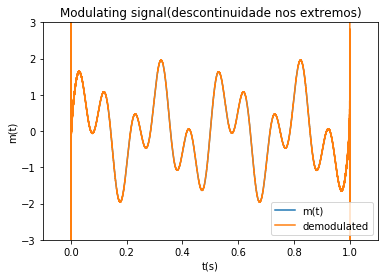

In [97]:
# Parâmetros da onda
import numpy as np
fc = 6000;                                              # Frequência da portadora
fm = 10;                                                # Frequência do sinal
Am = 1;                                                 # Amplitude do sinal 
Theta = np.pi/4;                                           # Fase do sinal
Beta = np.pi/5;                                            # Fase da portadora
Fs = 8*fc;                                              # Frequência de amostragem
duration = 0.5;                                         # Tempo final
t =  np.arange(0,1-1/Fs,1/Fs)                  # Eixo do tempo
 
m_t = Am*np.sin(2*np.pi*fm*t)+Am*np.sin(2*np.pi*0.4*fm*t)       # Sinal em banda base
kf=160*np.pi;                                              # Sensibilidade de frequencia 
m_intg=kf*np.cumsum(m_t)/Fs;                             # Somatório com Kf
x = np.cos(2*np.pi*fc*t +m_intg )                           # Sinal modulado
from scipy.signal import hilbert
# Hilbert
z= hilbert(x)                                        # Forma analítica (real + imaginario)
inst_phase = np.unwrap(np.angle(z));    # Fase instantânea com ajuste para variaçoes bruscas de angulo
p = np.polyfit(t,inst_phase,1);            # Ajustar linearmente a fase instantânea
# Reavaliar o termo de compensação usando os valores ajustados
estimated = np.polyval(p,t);                               
demodulated = inst_phase - estimated;
demodulated_aux = np.concatenate(([demodulated[0]],demodulated))
demodulated=np.diff(demodulated_aux)/(1/Fs*kf);

import matplotlib.pyplot as plt
plt.title('Modulating signal(descontinuidade nos extremos)')
plt.xlabel('t(s)')
plt.ylabel('m(t)')
plt.plot(t,m_t,t,demodulated)
plt.ylim([-3,3])
plt.xlim([-0.1,1.1])
plt.legend(['m(t)','demodulated'])
plt.show()

# Bibliografia

Oktay Alkin, Signals and Systems: A MATLAB® Integrated Approach, CRC Press, 2014.

C. Richard Johnson Jr, William A. Sethares, Andrew G. Klein, Software Receiver Design: Build your Own Digital Communication System in Five Easy Steps, Cambridge University Press, 1 edition, September 30, 2011.


B. P. Lathi, Zhi Ding, Modern Digital and Analog Communication Systems (The Oxford Series in Electrical and Computer Engineering), 4th Edition, Oxford University Press, 4th edition, January 23, 2009.

B. P. Lathi, Zhi Ding, Sistemas de comunicações analógicos e digitais modernos,  LTC Editora; Edição 4, 9 de março de 2012.

[Extracting instantaneous amplitude,phase,frequency – application of Analytic signal/Hilbert transform](http://www.gaussianwaves.com/2017/04/extracting-instantaneous-amplitude-phase-frequency-hilbert-transform/)

[Phase demodulation using Hilbert transform – application of analytic signal](http://www.gaussianwaves.com/2017/06/phase-demodulation-using-hilbert-transform-application-of-analytic-signal/)


